In [1]:
# Importing packages to be used later
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

wounds_all = pd.read_csv('Datasets/Wound Data.csv')

# Examining basic details about the data
display(wounds_all.info())

# Renaming Target column to eliminate the leading blank space
wounds_all.rename(columns={' Target':'Target'}, inplace=True)
wounds_all.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 15 columns):
Encounter #      1092 non-null int64
Location         1092 non-null object
Date             1092 non-null object
Weapon           1092 non-null object
Wielder          1092 non-null object
Attack Type      1092 non-null object
 Target          1092 non-null object
Acute Effect     1092 non-null object
Latent Effect    903 non-null object
Fight Context    1092 non-null object
Notes 1          681 non-null object
Notes 2          100 non-null object
Notes 3          19 non-null object
Citation         1092 non-null object
Text             1092 non-null object
dtypes: int64(1), object(14)
memory usage: 128.1+ KB


None

Index(['Encounter #', 'Location', 'Date', 'Weapon', 'Wielder', 'Attack Type',
       'Target', 'Acute Effect', 'Latent Effect', 'Fight Context', 'Notes 1',
       'Notes 2', 'Notes 3', 'Citation', 'Text'],
      dtype='object')

In [2]:
# Checking if each recorded date belongs to a specific location
display(wounds_all.groupby('Location')['Date'].unique())

# Including a continent column to make location more consistent
# Defining sort_continent function to place each location into a continent
def sort_continent(df):
    """Slices the dataframe by the Location column looking for key locations and sets the Continent column accordingly"""
    df['Continent'] = 'Europe'
    df.loc[df['Location'].str.contains('Ship|Sea|Straight|Coast|Waters|Lo River|Ocean|Off Cape'), 'Continent'] = 'Naval Combat'         
    df.loc[df['Location'].str.contains('Arga|Al-Mukah|Singapore|Tel el-Kebir|Kassassin|Sepoy|Buxar|India|Assaye|Fulailee|Afghani|Feroze|Mooltan|Chillianwal|Malabar|Batang|pore|Min River|Delhi|Loharee|Bundel|Pa Li|Mahara|Arhanga|Pales|Bengal|Poligar|Benares|Allygurh|Burma|Seet|Coorg|Punj|Persia|zee|Beloo|Kabul|Hydera|Mood|Aliwal|Ningpo|Ramn|Gooj|Deeg|Sering|Narnoul|Cawn|Lucknow|Sumsa|gunge|Khodaguni|Oudh|Jamo|Betwa|Jhansi|Mesopot'), 'Continent'] = 'Asia'
    df.loc[df['Location'].str.contains('various|Another|unspecified|Falconer'), 'Continent'] = 'unknown'
    df.loc[df['Location'].str.contains('Egypt|Africa|Zanzibar|Sudan|Khartoum|Abu Klea|Suakin|Tofrek|Hasheen|Teb|hlwana|Ulundi|Basuto|Omdur|Surinam'), 'Continent'] = 'Africa'
    df.loc[df['Location'].str.contains('Canad|New Orleans|Niagra|Savannah'), 'Continent'] = 'North America'
    df.loc[df['Location'].str.contains('Puerto Cab'), 'Continent'] = 'South America'
    df.loc[df['Location'].str.contains('Meeanee|Maori|Australia'), 'Continent'] = 'Oceania'
    
sort_continent(wounds_all)
display(wounds_all.Continent.value_counts())
wounds_all.columns


Location
AAR                                                                         [1834]
Abu Klea                                                                    [1885]
Achadelew, Scotland                                                         [1654]
Aegean Sea                                                                  [1825]
Afghanistan                      [1850s, 1840s, 1870s, 1840, 1849, 1841, 1879, ...
                                                       ...                        
Various                                                                    [1810s]
Waterloo                                                              [1815, 1816]
Waters off Cape Saint Vincent                                               [1833]
Western Front                                                      [1914, 1914-18]
unspecified                                                                [1830s]
Name: Date, Length: 153, dtype: object

Asia             518
Europe           359
Africa           100
Naval Combat      66
North America     19
Oceania           18
unknown            7
South America      5
Name: Continent, dtype: int64

Index(['Encounter #', 'Location', 'Date', 'Weapon', 'Wielder', 'Attack Type',
       'Target', 'Acute Effect', 'Latent Effect', 'Fight Context', 'Notes 1',
       'Notes 2', 'Notes 3', 'Citation', 'Text', 'Continent'],
      dtype='object')

In [3]:
# Cleaning the date column to contain only one year
display(wounds_all.Date.unique())

# Have to deal with 'unspecified', the century values, and decades ending in 's'
wounds_all.Date.replace('unspecified', '0', inplace=True)
wounds_all.Date.replace('18th century', '1750', inplace=True)
wounds_all.Date.replace('19th century', '1850', inplace=True)
wounds_all['Date'] = wounds_all.Date.str.strip('s')
wounds_all.Date.replace('1832-34', '1833', inplace=True)
wounds_all.Date.replace('1914-18', '1916', inplace=True)


array(['1645', '1654', '1679', '1680', '1689', '1803', '1715', '1745',
       '1746', '1832-34', '1812', '1810', '1834', '1810s', '1813', '1811',
       '1814', '1815', '1816', '1798', '1801', '1807', '1820', '1824',
       '1825', '1850s', '1865', '1881', '1887', '1882', '1883', '1885',
       '1854', '1857', '1888', '1764', '1760s', '1884', '1889',
       'unspecified', '1880s', '1879', '1759', '1843', '1840s', '1392',
       '1846', '1849', '1859', '1864', '1863', '1599', '1756', '1799',
       '1833', '1837', '1830s', '1826', '1853', '1860s', '1858', '1860',
       '1866', '1880', '1898', '1899', '1911', '1914', '1918', '1914-18',
       '1757', '1766', '1870s', '1820s', '1800s', '1827', '1805', '1817',
       '1818', '1848', '1856', '1839', '1840', '1841', '1842', '1845',
       '18th century', '19th century', '1804', '1844', '1610', '1611',
       '1613', '1640', '1773', '1779', '1915'], dtype=object)

In [4]:
# Converting the type to int
wounds_all['Date'] = wounds_all.Date.astype('int64')
wounds_all.Date.replace(0, np.nan, inplace=True)
wounds_all.Date.unique()

array([1645., 1654., 1679., 1680., 1689., 1803., 1715., 1745., 1746.,
       1833., 1812., 1810., 1834., 1813., 1811., 1814., 1815., 1816.,
       1798., 1801., 1807., 1820., 1824., 1825., 1850., 1865., 1881.,
       1887., 1882., 1883., 1885., 1854., 1857., 1888., 1764., 1760.,
       1884., 1889.,   nan, 1880., 1879., 1759., 1843., 1840., 1392.,
       1846., 1849., 1859., 1864., 1863., 1599., 1756., 1799., 1837.,
       1830., 1826., 1853., 1860., 1858., 1866., 1898., 1899., 1911.,
       1914., 1918., 1916., 1757., 1766., 1870., 1800., 1827., 1805.,
       1817., 1818., 1848., 1856., 1839., 1841., 1842., 1845., 1750.,
       1804., 1844., 1610., 1611., 1613., 1640., 1773., 1779., 1915.])

In [5]:
# Dropping columns with little data pertaining to wounding and situation
wounds_data = wounds_all.drop(columns=['Notes 1', 'Notes 2', 'Notes 3', 'Citation', 'Text', 'Encounter #', 'Location', 'Wielder'])
display(wounds_data.columns)
# During this step I cleaned a ton of typos in the csv file and standardized some categories
# I utilized a call of .value_counts() for each column to examine the contents and clean from there
# Even after cleaning weapons there were many types still
# Adding a weapon type column

def sort_wep_type(df):
    df['Weapon Type'] = 'Other'
    df.loc[df['Weapon'].str.contains('Saber|Cutlass'), 'Weapon Type'] = 'Sword_cutting'
    df.loc[df['Weapon'].str.contains('Polearm|Bayonet'), 'Weapon Type'] = 'Polearm'
    df.loc[df['Weapon'].str.contains('Broadsword|Rapier|Smallsword'), 'Weapon Type'] = 'Sword_vers'
    df.loc[df['Weapon'].str.contains('Sword|Greatsword'), 'Weapon Type'] = 'Sword_2h'
    df.loc[df['Weapon'].str.contains('Dagger|Kriss|Kukri'), 'Weapon Type'] = 'Dagger'
    df.loc[df['Weapon'].str.contains('Open Hand'), 'Weapon Type'] = 'Unarmed'
    df.loc[df['Weapon'].str.contains('Musket|Improvised'), 'Weapon Type'] = 'Club'
    
sort_wep_type(wounds_data)
# Can drop weapon from wounds_data now that we have categorized them for analysis
wounds_data = wounds_data.drop(columns='Weapon')
display(wounds_data.columns)

# Setting the data type of categorical columns as category
to_cat_list = ['Attack Type', 'Target', 'Acute Effect', 'Latent Effect',
       'Fight Context', 'Continent', 'Weapon Type']
wounds_data[to_cat_list] = wounds_data[to_cat_list].astype('category')


Index(['Date', 'Weapon', 'Attack Type', 'Target', 'Acute Effect',
       'Latent Effect', 'Fight Context', 'Continent'],
      dtype='object')

Index(['Date', 'Attack Type', 'Target', 'Acute Effect', 'Latent Effect',
       'Fight Context', 'Continent', 'Weapon Type'],
      dtype='object')

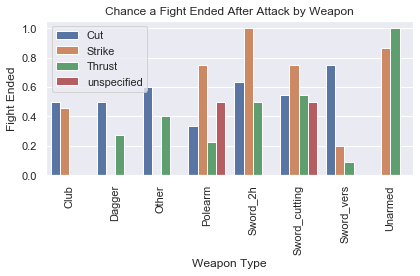

In [6]:
%matplotlib inline
# Creating a column of if the fight continued after the wound
wounds_data['Fight Ended'] = (wounds_data['Acute Effect'] == 'Death') | (wounds_data['Acute Effect'] == 'Incapacitation')

# Visualizing each weapon's capacity to end a fight with different attacks
sns.set()
sns.barplot(x='Weapon Type', y='Fight Ended', hue='Attack Type', data=wounds_data, ci=None)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Chance a Fight Ended After Attack by Weapon')
plt.tight_layout()
plt.savefig('Documents/Data Science Portfolio/FightEndWepAtk.png', dpi=400)

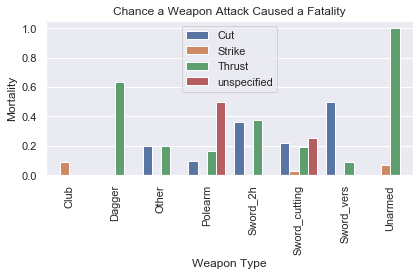

In [7]:
# Checking the mortality outcome of an encounter
wounds_data['Mortality'] = (wounds_data['Acute Effect'] == 'Death') | (wounds_data['Latent Effect'] == 'Death')

# Visualizing each weapon's capacity to result in a fatality
sns.barplot(x='Weapon Type', y='Mortality', hue='Attack Type', data=wounds_data, ci=None)
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.title('Chance a Weapon Attack Caused a Fatality')
plt.tight_layout()
plt.savefig('Documents/Data Science Portfolio/FatalityWepAtk.png', dpi=400)

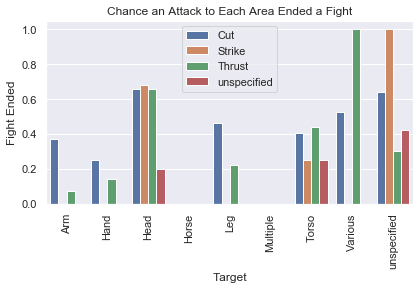

In [8]:
sns.barplot(x='Target', y='Fight Ended', hue='Attack Type', data=wounds_data, ci=None)
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.tight_layout()
plt.title('Chance an Attack to Each Area Ended a Fight')
plt.savefig('Documents/Data Science Portfolio/TargetFightEnd.png', dpi=400)

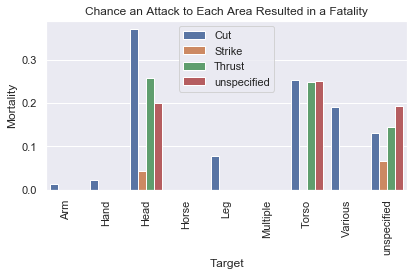

In [9]:
sns.barplot(x='Target', y='Mortality', hue='Attack Type', data=wounds_data, ci=None)
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.title('Chance an Attack to Each Area Resulted in a Fatality')
plt.tight_layout()
plt.savefig('Documents/Data Science Portfolio/FatalityTarget.png', dpi=400)

C:\Users\gnost\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


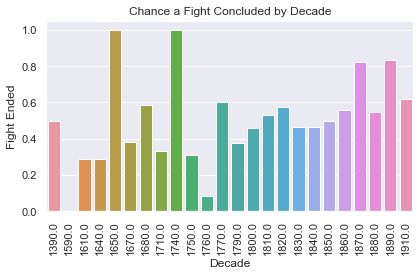

In [10]:
# From these results it is clear most attacks were not intended to deal a fatality, but rather to conclude the conflict
# While some weapons may not have ended a fight quickly, we can see some cases where the mortality rate stayed high

# Here I checked to see if humanity has grown more violent as time passes
wounds_data_decades = wounds_data[['Date', 'Fight Ended', 'Mortality']]
wounds_data_decades['Decade'] = np.floor(wounds_data_decades.Date/10)*10

sns.barplot(x='Decade', y='Fight Ended', data=wounds_data_decades, ci=None)
plt.xticks(rotation=90)
plt.title('Chance a Fight Concluded by Decade')
plt.tight_layout()
plt.savefig('Documents/Data Science Portfolio/FightEndDecade.png', dpi=400)


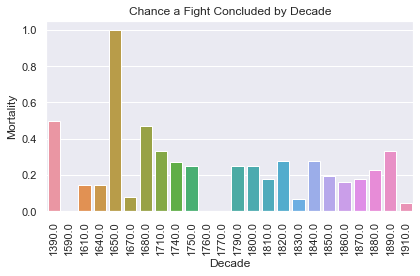

In [11]:
sns.barplot(x='Decade', y='Mortality', data=wounds_data_decades, ci=None)
plt.xticks(rotation=90)
plt.title('Chance a Fight Concluded by Decade')
plt.tight_layout()
plt.savefig('Documents/Data Science Portfolio/MortalityDecade.png', dpi=400)

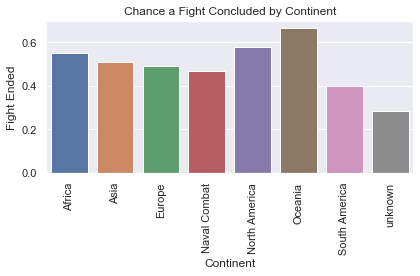

In [12]:
# Were any conflict areas more violent than others?
ax = sns.barplot(x='Continent', y='Fight Ended', data=wounds_data, ci=None)
plt.xticks(rotation=90)
plt.title('Chance a Fight Concluded by Continent')
plt.tight_layout()
plt.savefig('Documents/Data Science Portfolio/FightEndContinent.png', dpi=400)

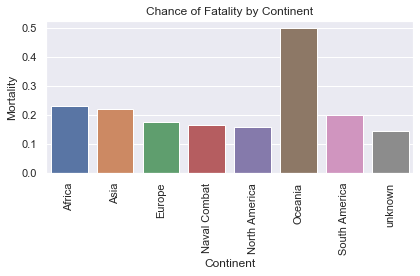

In [13]:
ax = sns.barplot(x='Continent', y='Mortality', data=wounds_data, ci=None)
plt.xticks(rotation=90)
plt.title('Chance of Fatality by Continent')
plt.tight_layout()
plt.savefig('Documents/Data Science Portfolio/FatalityContinent.png', dpi=400)

In [14]:
combined_results = wounds_data.groupby(['Weapon Type', 'Attack Type'])[['Fight Ended', 'Mortality']].mean()
display(combined_results)

Fight Ended  Mortality
Weapon Type   Attack Type                        
Club          Cut             0.500000   0.000000
              Strike          0.454545   0.090909
              Thrust          0.000000   0.000000
              unspecified          NaN        NaN
Dagger        Cut             0.500000   0.000000
              Strike               NaN        NaN
              Thrust          0.272727   0.636364
              unspecified          NaN        NaN
Other         Cut             0.600000   0.200000
              Strike               NaN        NaN
              Thrust          0.400000   0.200000
              unspecified     0.000000   0.000000
Polearm       Cut             0.333333   0.095238
              Strike          0.750000   0.000000
              Thrust          0.228814   0.161017
              unspecified     0.500000   0.500000
Sword_2h      Cut             0.636364   0.363636
              Strike          1.000000   0.000000
              Thrust          0.500000   0.375000
              unspecified     0.000000   0.000000
Sword_cutting Cut             0.545455   0.219554
              Strike          0.750000   0.031250
              Thrust          0.543860   0.192982
              unspecified     0.500000   0.250000
Sword_vers    Cut             0.750000   0.500000
              Strike          0.200000   0.000000
              Thrust          0.090909   0.090909
              unspecified          NaN        NaN
Unarmed       Cut                  NaN        NaN
              Strike          0.866667   0.066667
              Thrust          1.000000   1.000000
              unspecified          NaN        NaN

In [15]:
wounds_data.to_csv('Documents/Data Science Portfolio/Wounds Project/Wounds Data.csv')
wounds_all.to_csv('Documents/Data Science Portfolio/Wounds Project/Wounds All.csv')
combined_results.to_csv('Documents/Data Science Portfolio/Wounds Project/Wounds Results.csv')